In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Preprocess and explore the dataset

In [28]:
#import the dataset
dataset = pd.read_csv('cover_data.csv')

#analyze the dataset
print(dataset.head())
print(dataset.describe())
print(dataset.info())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

# Build and train your model

In [29]:
#separate the features and labels
labels = dataset.iloc[:,-1]
features = dataset.iloc[:, 0:-1]

#split the dataset into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.20, random_state=28, stratify=labels)

  # normalize data
scaler = StandardScaler()
features_train_normalized = scaler.fit_transform(features_train)
features_test_normalized = scaler.transform(features_test)

#build the model
my_model = Sequential()
my_model.add(layers.Dense(128, input_dim=features_train_normalized.shape[1], activation = 'relu'))
my_model.add(layers.Dropout(0.2))
my_model.add(layers.Dense(64, activation = 'relu'))
my_model.add(layers.Dropout(0.2))
my_model.add(layers.Dense(8, activation = 'softmax'))
print(my_model.summary())

#compile the model
opt = Adam(learning_rate = 0.001)

my_model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = opt)

#train the model
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.001, patience=4)
history = my_model.fit(features_train_normalized, labels_train, validation_data=(features_test_normalized, labels_test), epochs = 100, batch_size=64, callbacks=[earlystop_callback], validation_split=0.1, verbose=1)

#plot the training history
res_mse, res_mae = my_model.evaluate(features_test_normalized, labels_test)
print(res_mse, res_mae)

/opt/miniconda3/envs/codecademy/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,816 (61.78 KB)

 Trainable params: 15,816 (61.78 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.7115 - loss: 0.6905 - val_accuracy: 0.7835 - val_loss: 0.4976
Epoch 2/100
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.7744 - loss: 0.5238 - val_accuracy: 0.8097 - val_loss: 0.4484
Epoch 3/100
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 7s 989us/step - accuracy: 0.7907 - loss: 0.4885 - val_accuracy: 0.8242 - val_loss: 0.4158
Epoch 4/100
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 7s 966us/step - accuracy: 0.8007 - loss: 0.4683 - val_accuracy: 0.8306 - val_loss: 0.4018
Epoch 5/100
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 7s 962us/step - accuracy: 0.8066 - loss: 0.4548 - val_accuracy: 0.8404 - val_loss: 0.3852
Epoch 6/100
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 7s 959us/step - accuracy: 0.8107 - loss: 0.4455 - val_accuracy: 0.8422 - val_loss: 0.3787
Epoch 7/100
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 7s 959us/step - accuracy: 0.8155 - loss: 0.4357 - val_accuracy: 0.8468 - val_loss: 0.3688
Epoch 8/100
7263/7263 ━━━━━━━━━━━━━━━━━━━━ 7s 983us/step - accuracy:

# Plot model performance

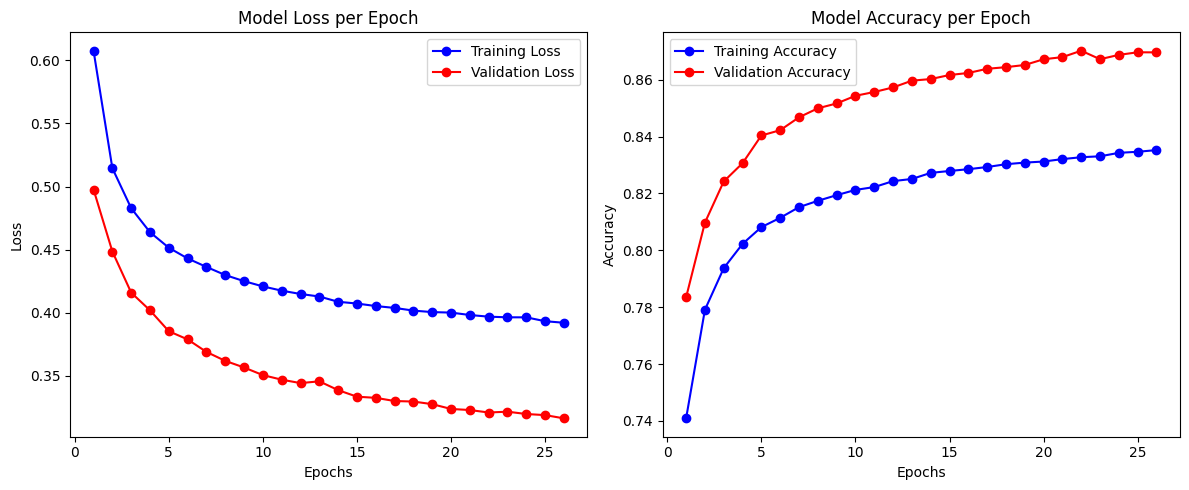

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 1s 319us/step
R-squared Value: -0.9525


In [30]:
# extract the training history
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

# create the plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# plot the loss
ax[0].plot(epochs, loss, 'bo-', label='Training Loss')
ax[0].plot(epochs, val_loss, 'ro-', label='Validation Loss')
ax[0].set_title('Model Loss per Epoch')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# plot the accuracy
ax[1].plot(epochs, accuracy, 'bo-', label='Training Accuracy')
ax[1].plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
ax[1].set_title('Model Accuracy per Epoch')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# show the plots
plt.tight_layout()
plt.show()

# evaluate the model
predictions = my_model.predict(features_test_scaled)

# calculate the R-squared value
r2 = r2_score(labels_test, predictions.argmax(axis=1))

print(f'R-squared Value: {r2:.4f}')